# Dipole EMission on Substate

In [5]:
import numpy as np
import datetime
from class_BFP_Image_QD import BFP_Image_QD
from scipy.optimize import curve_fit
import Fun_BFP_Image
import matplotlib.pyplot as plt

In [15]:
WL0 = 655e-9
nUp = 1
nDn = 1

p0 = np.array([0, 0, 1])

# To simulate the upper space
# -------------------------------------------------------------------------------------
# Initialize the coordinate for each layer
# The dipole should be better in the coordinate z=0
dl = np.zeros((nUp + nDn, 1))
dis = 17e-9
dl[1] = 100e-9
dl[0] = 0

# The position of the dipole
POSD = dl[nDn - 1] + dis



# Initialize the permitivity
Eplist = np.zeros((nUp + nDn + 1, 1), dtype=complex)


Eplist[2] = 1
Eplist[1] = 1
Eplist[0] = 1.4564**2

DUp = BFP_Image_QD(Eplist, dl, nUp, nDn, p0, WL0, POSD)


# To simulate the upper space
# -------------------------------------------------------------------------------------
# Initialize the coordinate for each layer
# The dipole should be better in the coordinate z=0
dl = np.zeros((nUp + nDn, 1))
dis = 17e-9
dl[1] = 100e-9
dl[0] = 0

# The position of the dipole
POSD = dl[nDn ] - dis



# Initialize the permitivity
Eplist = np.zeros((nUp + nDn + 1, 1), dtype=complex)


Eplist[2] = 1.4564**2
Eplist[1] = 1**2
Eplist[0] = 1

DDn = BFP_Image_QD(Eplist, dl, nUp, nDn, p0, WL0, POSD)







num_kx = 200
num_ky = 200

NA=1.4564
# first interpolate to krho kphi
num_krho = num_kx
num_kphi = num_ky
krho = np.linspace(0 + 1e-5, 1 + 1e-5, num_kx) * D1.k0 * NA
kphi = np.linspace(0, 2*np.pi, num_kphi)
krho_grid, kphi_grid = np.meshgrid(krho, kphi)
kx_grid = krho_grid*np.cos(kphi_grid)
ky_grid = krho_grid*np.sin(kphi_grid)

2021-06-29 20:31:12:The Basic Parameters Have Been Initialized!!!
2021-06-29 20:31:12:The Basic Parameters Have Been Initialized!!!


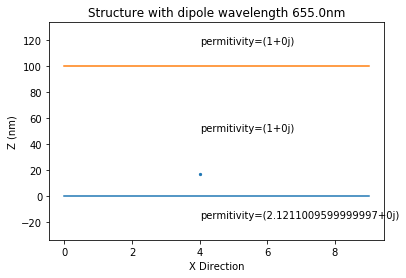

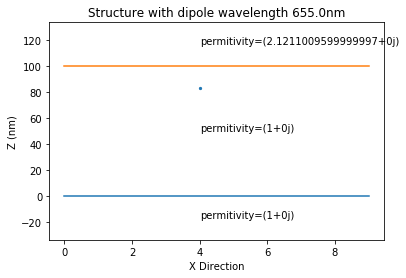

In [16]:
DUp.Show_Structure()
DDn.Show_Structure()

In [17]:
# Initialize the Green Function
DUp.Cal_Green_List(kx_grid, ky_grid)
DDn.Cal_Green_List(kx_grid, ky_grid)

2021-06-29 20:32:29: The Green Function Has Been Prepared
2021-06-29 20:33:25: The Green Function Has Been Prepared


0

In [19]:
px=np.array([1, 0, 0])
py=np.array([0, 1, 0])
pz=np.array([0, 0, 1])

PatternUpDx = DUp.Cal_PatternUp_List_QD_p1p2(px, px*0)
PatternUpDy = DUp.Cal_PatternUp_List_QD_p1p2(py, py*0)
PatternUpDz = DUp.Cal_PatternUp_List_QD_p1p2(pz, pz*0)
PatternDnDx = DDn.Cal_PatternUp_List_QD_p1p2(px, px*0)
PatternDnDy = DDn.Cal_PatternUp_List_QD_p1p2(py, py*0)
PatternDnDz = DDn.Cal_PatternUp_List_QD_p1p2(pz, pz*0)

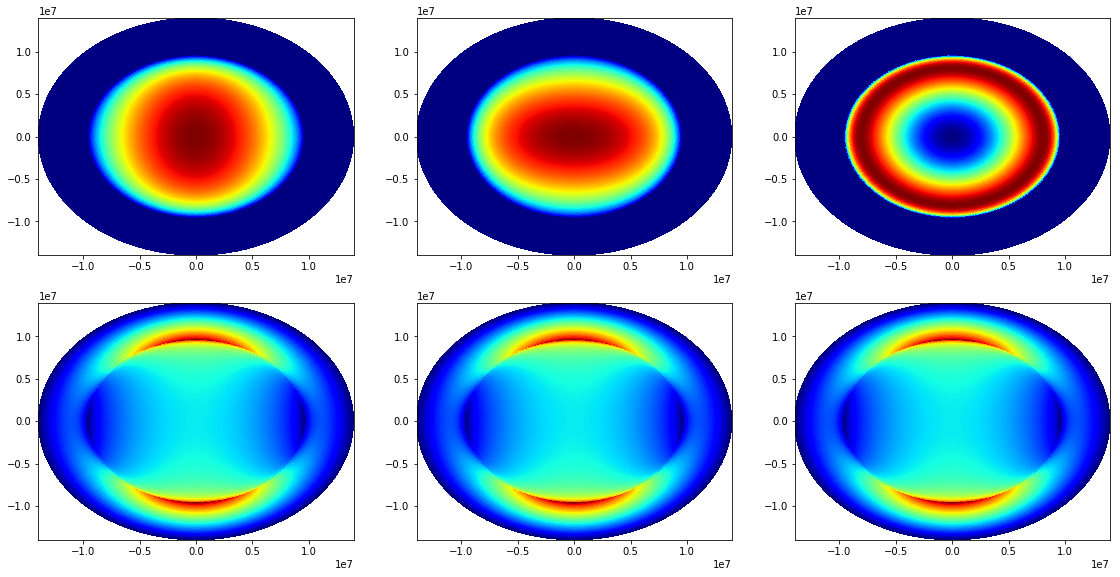

In [21]:
fig1 = plt.figure(figsize=(6.4*3,4.8*2))
plt.subplot(231)
plt.pcolormesh(kx_grid,ky_grid,PatternUpDx, cmap='jet')
plt.title('Up Dx')
plt.subplot(232)
plt.pcolormesh(kx_grid,ky_grid,PatternUpDy, cmap='jet')
plt.title('Up Dy')
plt.subplot(233)
plt.pcolormesh(kx_grid,ky_grid,PatternUpDz, cmap='jet')
plt.title('Up Dz')
plt.subplot(234)
plt.pcolormesh(kx_grid,ky_grid,PatternDnDx, cmap='jet')
plt.title('Down Dx')
plt.subplot(235)
plt.pcolormesh(kx_grid,ky_grid,PatternDnDx, cmap='jet')
plt.title('Down Dx')
plt.subplot(236)
plt.pcolormesh(kx_grid,ky_grid,PatternDnDx, cmap='jet')
plt.show()